In [23]:
import numpy as np
import matplotlib.pyplot as plt
import DeconUtility
import skimage
#matplotlib inline

In [24]:
# from https://stackoverflow.com/questions/7687679/how-to-generate-2d-gaussian-with-python
def makeGaussian(size, fwhm = 3, center=None):
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

In [25]:
def FFTConvolve(img, OTF):
    return np.real(np.fft.ifft2((np.fft.fft2(img)*OTF)))

Text(0.5, 1.0, 'shifted psf')

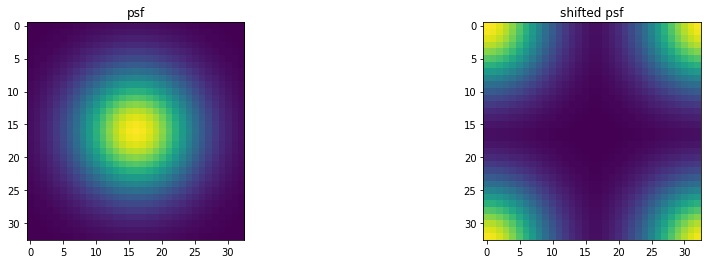

In [26]:
psf=makeGaussian(33,15)
shiftedpsf=np.fft.ifftshift(psf)

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].imshow(psf)
ax[0].set_title('psf')
ax[1].imshow(shiftedpsf)
ax[1].set_title('shifted psf')

(200, 200)


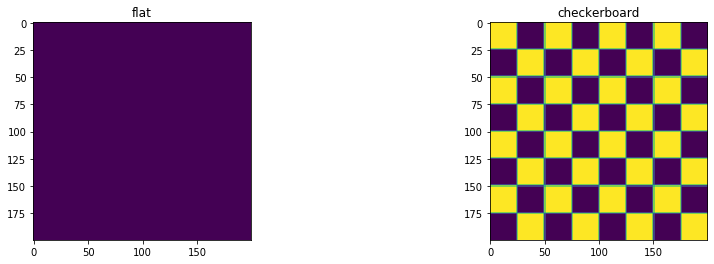

In [27]:
img=skimage.data.checkerboard()
flat=np.ones(img.shape)

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].imshow(flat)
ax[0].set_title('flat')
ax[1].imshow(img)
ax[1].set_title('checkerboard')

plt.imshow(img)
print(img.shape)


#extdims=DeconUtility.getPadSize(img, psf)
#print(extdims)
#import DeconUtility

[233, 233]
(200, 200)
(233, 233)
(233, 233)


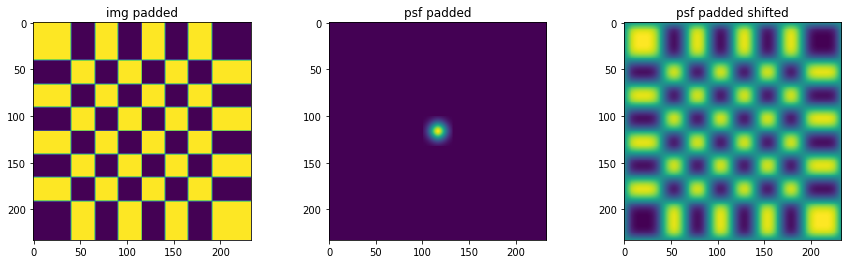

In [11]:
extDims=DeconUtility.getPadSize(img, psf)
(imgpadded, padding)=DeconUtility.padNDImage(img, extDims, 'reflect')
(psfpadded, padding)=DeconUtility.padNDImage(psf, extDims, 'constant')

psfshifted=np.fft.ifftshift(psfpadded)

fig, ax = plt.subplots(1,3)
fig.set_figwidth(15)
ax[0].imshow(imgpadded)
ax[0].set_title('img padded')
ax[1].imshow(psfpadded)
ax[1].set_title('psf padded')
ax[2].imshow(psfshifted)
ax[2].set_title('psf padded shifted')

print(img.shape)
print(imgpadded.shape)

convolved = FFTConvolve(imgpadded, np.fft.fft2(psfshifted))
#convolved=np.real(np.fft.ifft2((np.fft.fft2(imgpadded)*np.fft.fft2(psfshifted))))
print(convolved.shape)
plt.imshow(convolved)

[116, 116]


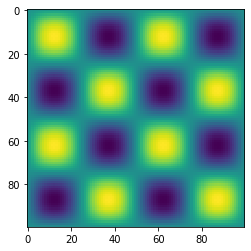

In [12]:
center=[int(np.floor(imgpadded.shape[0]/2)), int(np.floor(imgpadded.shape[1]/2))]
print(center)

acq=convolved[center[0]-50:center[0]+50,center[1]-50:center[1]+50]
plt.imshow(acq)

In [37]:
(paddedpsf, padding)=DeconUtility.padNDImage(psf,acq.shape,'constant')
shiftedpsf=np.fft.ifftshift(paddedpsf)
print(shiftedpsf.shape)
print(paddedpsf.shape)

OTF=np.fft.fft2(shiftedpsf)
OTF_conj=np.conj(OTF)
estimate=acq
for i in range(10):
    reblurred = FFTConvolve(estimate,OTF)
    correction = FFTConvolve(acq/reblurred, OTF_conj)
    estimate=estimate*correction


(100, 100)
(100, 100)


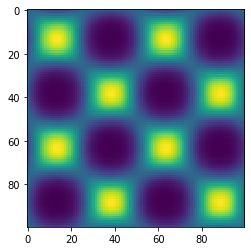

In [38]:
plt.imshow(estimate)

In [36]:
extDims=DeconUtility.getPadSize(acq, psf)
normal=np.ones_like(acq);

(imgpadded, padding)=DeconUtility.padNDImage(acq, extDims, 'constant')
(normal, padding)=DeconUtility.padNDImage(normal, extDims, 'constant')
(psfpadded, padding)=DeconUtility.padNDImage(psf, extDims, 'constant')
shiftedpsf=np.fft.ifftshift(psfpadded)

OTF=np.fft.fft2(shiftedpsf)
OTF_conj=np.conj(OTF)
normal = FFTConvolve(normal, OTF_conj)
estimate=imgpadded

for i in range(10):
    reblurred = FFTConvolve(estimate,OTF)
    correction = FFTConvolve(imgpadded/reblurred, OTF_conj)
    estimate=estimate*correction
    estimate=estimate/normal

[133, 133]


ValueError: operands could not be broadcast together with shapes (100,100) (133,133) 